In [1]:
# nltk.download('vader_lexicon')

In [2]:
# pip install nrclex

In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.util import ngrams

from nrclex import NRCLex

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

## Sentiment analysis on cleaned data with stop words

In [4]:
senti_1 = pd.read_csv('cleaned_data.csv')
senti_1 = senti_1.dropna()
senti_1

,class,tweets
0,figurative,sarcasm for people who do not understand diy a...
1,figurative,man wish could sexually harass an intoxicated ...
2,figurative,ciarakellydoc lunchtiment do not be daft dr ci...
3,figurative,totally not panicattack inducing way to spend ...
4,figurative,this is my bed it is all the way on the floor ...
...,...,...
52715,sarcasm,photo image via we heart it childhood cool fun...
52716,sarcasm,never knew better put this out to the universe...
52717,sarcasm,hey just wanted to say thanks puberty for lett...
52718,sarcasm,am sure coverage like the fox news special the...


In [5]:
sa1 = senti_1["tweets"].apply(lambda senti_1: sid.polarity_scores(senti_1))
senti_1["sentiment_label"] = sa1.apply(lambda sentiment: "positive" if sentiment["compound"] > 0 else "negative" if sentiment["compound"] < 0 else "neutral")

senti_1.head()

,class,tweets,sentiment_label
0,figurative,sarcasm for people who do not understand diy a...,negative
1,figurative,man wish could sexually harass an intoxicated ...,negative
2,figurative,ciarakellydoc lunchtiment do not be daft dr ci...,positive
3,figurative,totally not panicattack inducing way to spend ...,negative
4,figurative,this is my bed it is all the way on the floor ...,positive


In [6]:
l_df = senti_1["sentiment_label"] .value_counts()

label_df = pd.DataFrame({'sentiment_label':l_df.index, 'count': l_df.values})
label_df

,sentiment_label,count
0,positive,25335
1,negative,22663
2,neutral,4722


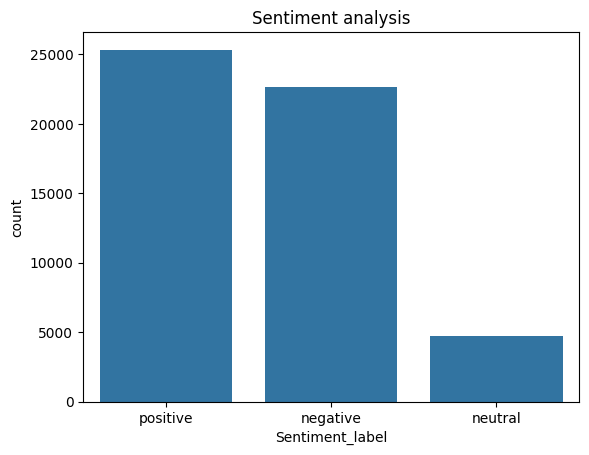

In [7]:
sns.barplot(x = "sentiment_label", y= 'count', data =label_df)
plt.xlabel('Sentiment_label')
plt.ylabel('count')
plt.title('Sentiment analysis')
plt.show()

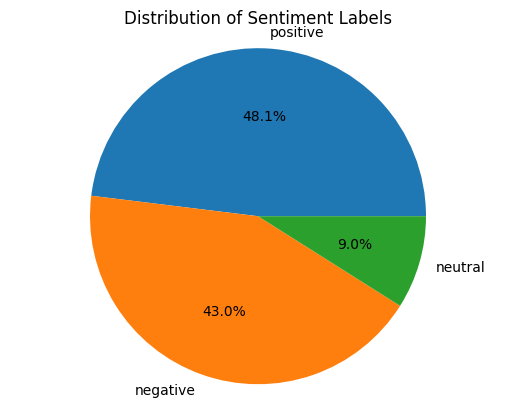

In [8]:
plt.pie(label_df['count'], labels=label_df['sentiment_label'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [9]:
senti_1["average_sentiment_score"] = sa1.apply(lambda sentiment: sentiment["compound"])
senti_1.head()

,class,tweets,sentiment_label,average_sentiment_score
0,figurative,sarcasm for people who do not understand diy a...,negative,-0.2263
1,figurative,man wish could sexually harass an intoxicated ...,negative,-0.3400
2,figurative,ciarakellydoc lunchtiment do not be daft dr ci...,positive,0.6529
3,figurative,totally not panicattack inducing way to spend ...,negative,-0.2263
4,figurative,this is my bed it is all the way on the floor ...,positive,0.3612


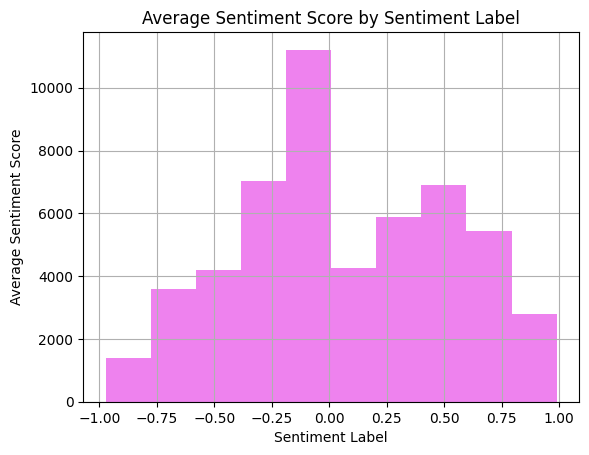

In [10]:
plt.hist(senti_1['average_sentiment_score'], color = 'violet')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Sentiment Label')
plt.grid(True)
plt.show()

In [11]:
# Function to get the maximum emotion from the affect frequencies dictionary
def get_max_emotion(emotions_dict):
    max_emotion = max(emotions_dict, key=emotions_dict.get)
    return max_emotion

# Applying emotional mining using NRCLex and get the emotion
sa_e1 = senti_1["tweets"].apply(lambda senti_1: NRCLex(senti_1).affect_frequencies)
sa_e1

0        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
1        {'fear': 0.08333333333333333, 'anger': 0.16666...
2        {'fear': 0.16666666666666666, 'anger': 0.11111...
3        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
4        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
                               ...                        
52715    {'fear': 0.0, 'anger': 0.14285714285714285, 'a...
52716    {'fear': 0.0, 'anger': 0.16666666666666666, 'a...
52717    {'fear': 0.0, 'anger': 0.14285714285714285, 'a...
52718    {'fear': 0.0, 'anger': 0.08333333333333333, 'a...
52719    {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
Name: tweets, Length: 52720, dtype: object

In [12]:
#get the maximum emotion
senti_1["max_emotion"] = senti_1["tweets"].apply(lambda senti_1: get_max_emotion(NRCLex(senti_1).affect_frequencies))

senti_1.head()

,class,tweets,sentiment_label,average_sentiment_score,max_emotion
0,figurative,sarcasm for people who do not understand diy a...,negative,-0.2263,anger
1,figurative,man wish could sexually harass an intoxicated ...,negative,-0.3400,negative
2,figurative,ciarakellydoc lunchtiment do not be daft dr ci...,positive,0.6529,negative
3,figurative,totally not panicattack inducing way to spend ...,negative,-0.2263,anger
4,figurative,this is my bed it is all the way on the floor ...,positive,0.3612,anger


In [13]:
max_em1 =(senti_1['max_emotion'].value_counts())
emotion_label1 =  pd.DataFrame({"emotion": max_em1.index,"count": max_em1.values })
emotion_label1

,emotion,count
0,anger,15297
1,fear,10779
2,positive,9351
3,negative,7762
4,trust,6588
5,anticipation,1367
6,surprise,1030
7,sadness,389
8,disgust,110
9,joy,47


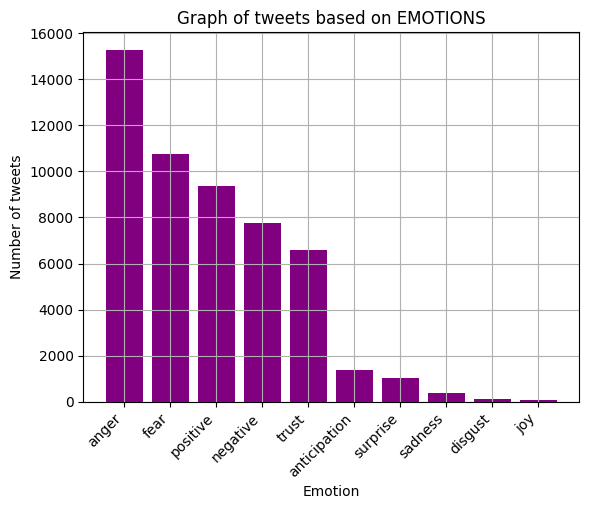

In [14]:
# Create a line plot for the average sentiment scores
plt.bar(emotion_label1["emotion"], emotion_label1['count'], color = 'purple')
plt.xlabel('Emotion')
plt.ylabel('Number of tweets')
plt.title('Graph of tweets based on EMOTIONS')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

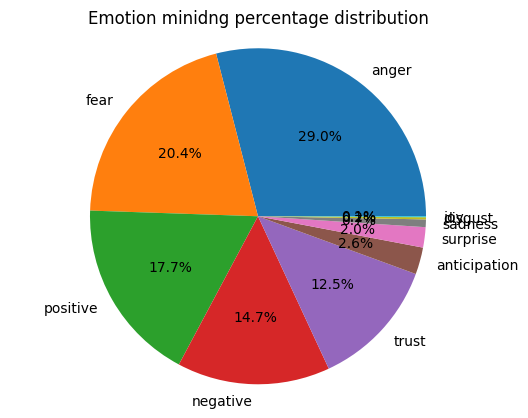

In [15]:
plt.pie(emotion_label1['count'], labels = emotion_label1["emotion"], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Emotion minidng percentage distribution')
plt.show()

## Sentiment analysis on cleaned data without stop words

In [16]:
senti_2 = pd.read_csv('cleaned_data_very.csv')
senti_2=senti_2.dropna()
senti_2

,class,tweets
0,figurative,sarcasm people understand diy artattack
1,figurative,man wish could sexually harass intoxicated min...
2,figurative,ciarakellydoc lunchtiment daft dr ciara measle...
3,figurative,totally panicattack inducing way spend sunday ...
4,figurative,bed way floor yay sarcasm
...,...,...
52590,sarcasm,photo image via heart childhood cool funny sar...
52591,sarcasm,never knew better put universe lol maybe date ...
52592,sarcasm,hey wanted say thanks puberty letting apart it...
52593,sarcasm,sure coverage like fox news special hidden har...


In [17]:
sa2 = senti_2["tweets"].apply(lambda senti_2: sid.polarity_scores(senti_2))
senti_2["sentiment_label"] = sa2.apply(lambda sentiment: "positive" if sentiment["compound"] > 0 else "negative" if sentiment["compound"] < 0 else "neutral")

senti_2.head()

,class,tweets,sentiment_label
0,figurative,sarcasm people understand diy artattack,negative
1,figurative,man wish could sexually harass intoxicated min...,negative
2,figurative,ciarakellydoc lunchtiment daft dr ciara measle...,negative
3,figurative,totally panicattack inducing way spend sunday ...,negative
4,figurative,bed way floor yay sarcasm,positive


In [18]:
l_df2 = senti_2["sentiment_label"] .value_counts()

label_df2 = pd.DataFrame({'sentiment_label':l_df2.index, 'count': l_df2.values})
label_df2

,sentiment_label,count
0,positive,25523
1,negative,22224
2,neutral,4848


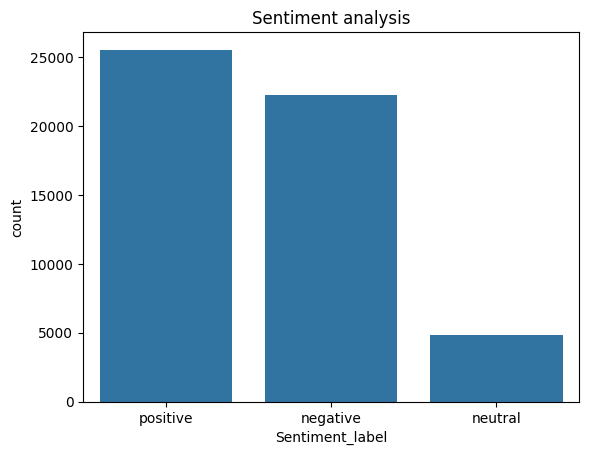

In [19]:
sns.barplot(x = "sentiment_label", y= 'count', data =label_df2)
plt.xlabel('Sentiment_label')
plt.ylabel('count')
plt.title('Sentiment analysis')
plt.show()

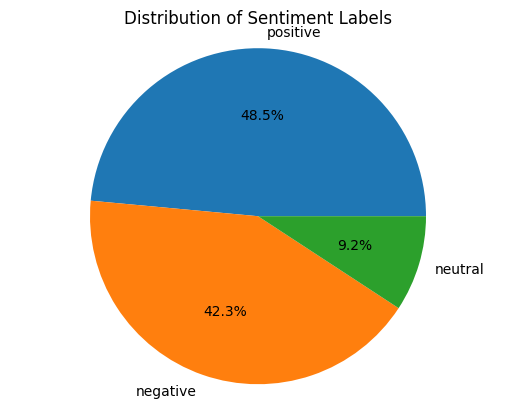

In [20]:
plt.pie(label_df2['count'], labels=label_df2['sentiment_label'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [21]:
senti_2["average_sentiment_score"] = sa2.apply(lambda sentiment: sentiment["compound"])
senti_2.head()

,class,tweets,sentiment_label,average_sentiment_score
0,figurative,sarcasm people understand diy artattack,negative,-0.2263
1,figurative,man wish could sexually harass intoxicated min...,negative,-0.3400
2,figurative,ciarakellydoc lunchtiment daft dr ciara measle...,negative,-0.6249
3,figurative,totally panicattack inducing way spend sunday ...,negative,-0.2263
4,figurative,bed way floor yay sarcasm,positive,0.3612


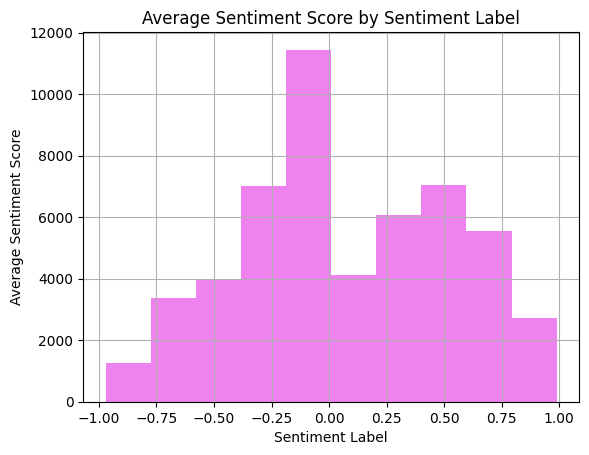

In [22]:
plt.hist(senti_2['average_sentiment_score'], color = 'violet')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Sentiment Label')
plt.grid(True)
plt.show()


In [23]:
# Applying emotional mining using NRCLex and get the emotion
sa_e2 = senti_2["tweets"].apply(lambda senti_2: NRCLex(senti_2).affect_frequencies)
sa_e2

0        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
1        {'fear': 0.08333333333333333, 'anger': 0.16666...
2        {'fear': 0.16666666666666666, 'anger': 0.11111...
3        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
4        {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
                               ...                        
52590    {'fear': 0.0, 'anger': 0.14285714285714285, 'a...
52591    {'fear': 0.0, 'anger': 0.16666666666666666, 'a...
52592    {'fear': 0.0, 'anger': 0.14285714285714285, 'a...
52593    {'fear': 0.0, 'anger': 0.08333333333333333, 'a...
52594    {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
Name: tweets, Length: 52595, dtype: object

In [24]:
#get the maximum emotion
def get_max_emotion(emotions_dict):
    max_emotion = max(emotions_dict, key=emotions_dict.get)
    return max_emotion
senti_2["max_emotion"] = senti_2["tweets"].apply(lambda senti_2: get_max_emotion(NRCLex(senti_2).affect_frequencies))

senti_2.head()

,class,tweets,sentiment_label,average_sentiment_score,max_emotion
0,figurative,sarcasm people understand diy artattack,negative,-0.2263,anger
1,figurative,man wish could sexually harass intoxicated min...,negative,-0.3400,negative
2,figurative,ciarakellydoc lunchtiment daft dr ciara measle...,negative,-0.6249,negative
3,figurative,totally panicattack inducing way spend sunday ...,negative,-0.2263,anger
4,figurative,bed way floor yay sarcasm,positive,0.3612,anger


In [25]:
max_em2 =(senti_2['max_emotion'].value_counts())
emotion_label2 =  pd.DataFrame({"emotion": max_em2.index,"count": max_em2.values })
emotion_label2

,emotion,count
0,anger,15242
1,fear,10746
2,positive,9333
3,negative,7756
4,trust,6574
5,anticipation,1368
6,surprise,1030
7,sadness,389
8,disgust,110
9,joy,47


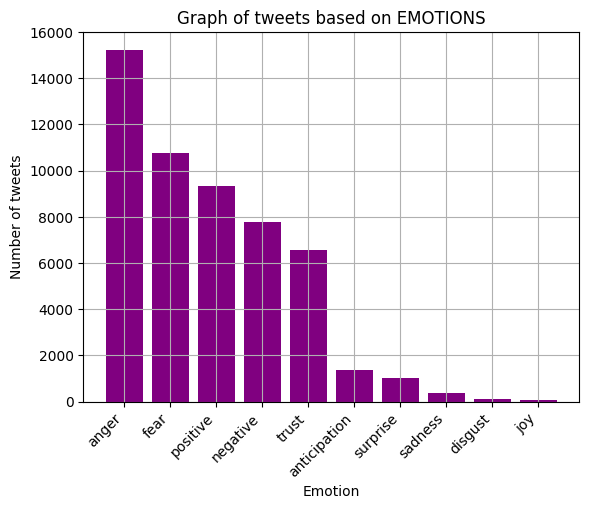

In [26]:
# Create a line plot for the average sentiment scores
plt.bar(emotion_label2["emotion"], emotion_label2['count'], color = 'purple')
plt.xlabel('Emotion')
plt.ylabel('Number of tweets')
plt.title('Graph of tweets based on EMOTIONS')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

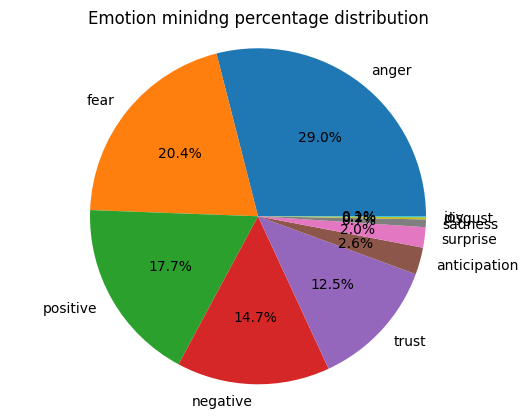

In [27]:
plt.pie(emotion_label2['count'], labels = emotion_label2["emotion"], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Emotion minidng percentage distribution')
plt.show()

## Comparision: WITH STOP WORD vs WITHOUT STOP WORDS

In [28]:
sentiment_values = pd.merge(label_df, label_df2, on = 'sentiment_label')
sentiment_values=sentiment_values.rename(columns=({'count_x':"With STOP WORDS","count_y": "Without STOP WORDS"}))
sentiment_values['difference'] = sentiment_values['With STOP WORDS']-sentiment_values['Without STOP WORDS']
sentiment_values

,sentiment_label,With STOP WORDS,Without STOP WORDS,difference
0,positive,25335,25523,-188
1,negative,22663,22224,439
2,neutral,4722,4848,-126


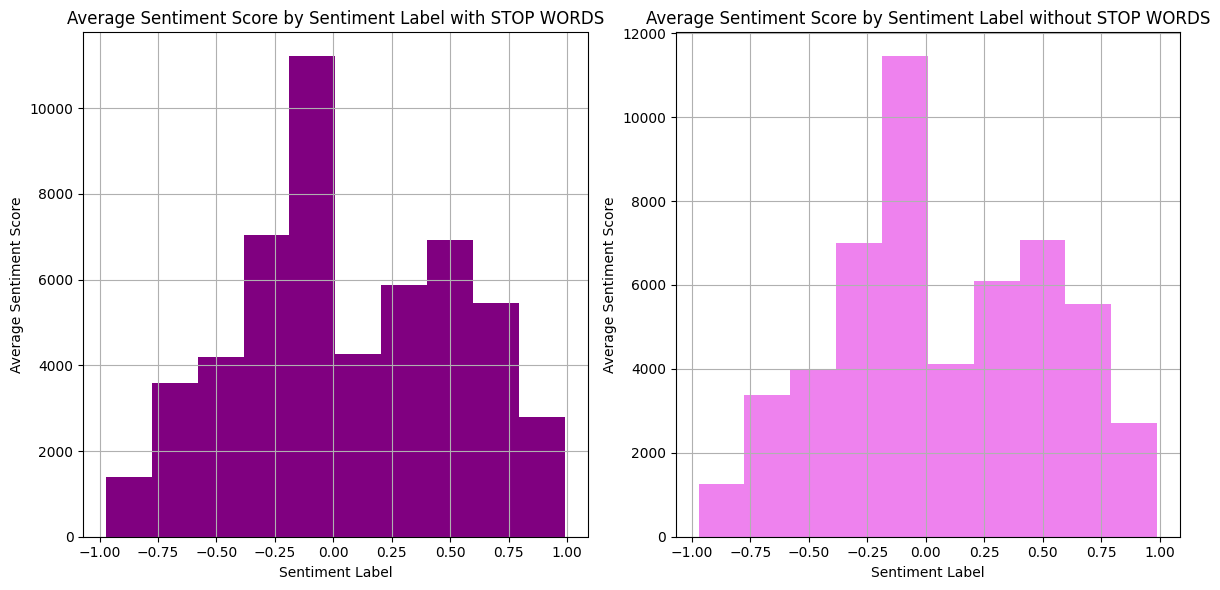

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(senti_1['average_sentiment_score'], color='purple')
axs[0].set_xlabel('Sentiment Label')
axs[0].set_ylabel('Average Sentiment Score')
axs[0].set_title('Average Sentiment Score by Sentiment Label with STOP WORDS')
axs[0].grid(True)

axs[1].hist(senti_2['average_sentiment_score'], color='violet')
axs[1].set_xlabel('Sentiment Label')
axs[1].set_ylabel('Average Sentiment Score')
axs[1].set_title('Average Sentiment Score by Sentiment Label without STOP WORDS')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
emotion_values = pd.merge(emotion_label1, emotion_label2, on = 'emotion')
emotion_values=emotion_values.rename(columns=({'count_x':"With STOP WORDS","count_y": "Without STOP WORDS"}))
emotion_values['difference'] = emotion_values["With STOP WORDS"] - emotion_values["Without STOP WORDS"]
emotion_values

,emotion,With STOP WORDS,Without STOP WORDS,difference
0,anger,15297,15242,55
1,fear,10779,10746,33
2,positive,9351,9333,18
3,negative,7762,7756,6
4,trust,6588,6574,14
5,anticipation,1367,1368,-1
6,surprise,1030,1030,0
7,sadness,389,389,0
8,disgust,110,110,0
9,joy,47,47,0


### * It can be observed that there is a minor difference between with and without stop words, hence further analysis can be proceeded without stop words